# Predicting sale price of Bulldozers using Machine Learning

## 1. Problem Definition
> Predict the future sale price of a Bulldozer based on it's characteristics and past sales of similar bulldozers.

## 2. Data
The data is taken from the Kaggle competition - `Blue Book for Bulldozers` : https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 datasets for the problem - 
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012.
* Test.csv is the test set which contains data from May 1, 2012 - November 2012.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.  
**Note** - In a regression problem, the goal is to reduce the error as much as possible. i.e. for the given problem, reduce RMSLE.

## 4. Features
Kaggle provides a data dictionary for the features present in the datasets.  
Data Dictionary google spreadsheet : https://docs.google.com/spreadsheets/d/1TdR-DKtUNUdwcuawLolL_K8bA28_ms2z_7K5Hza0wng/edit?usp=sharing

**Importing Modules**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

### Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df["saledate"][:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

In [7]:
df["saledate"].dtype

dtype('O')

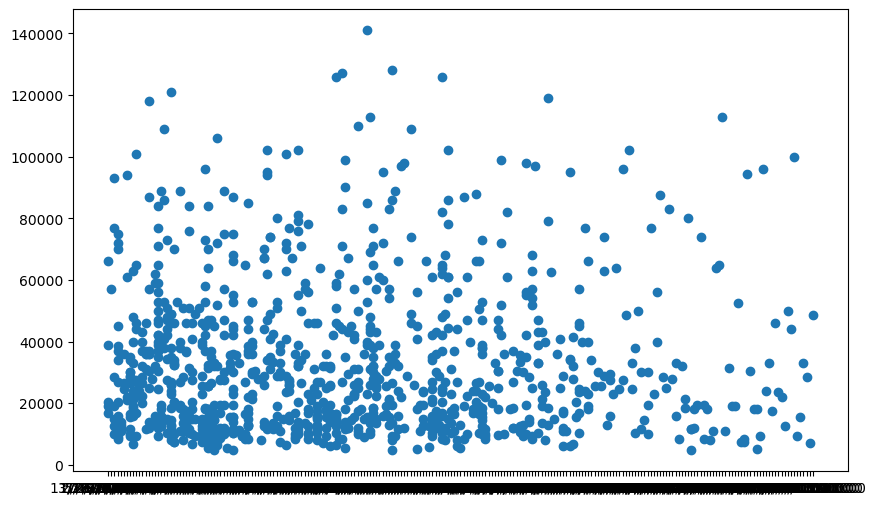

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

The saledate column contains datetime data and must be parsed as datetime during importation

In [9]:
# Reimporting with parsed datetime
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])

In [10]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df["saledate"][:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

In [12]:
df["saledate"].dtype

dtype('<M8[ns]')

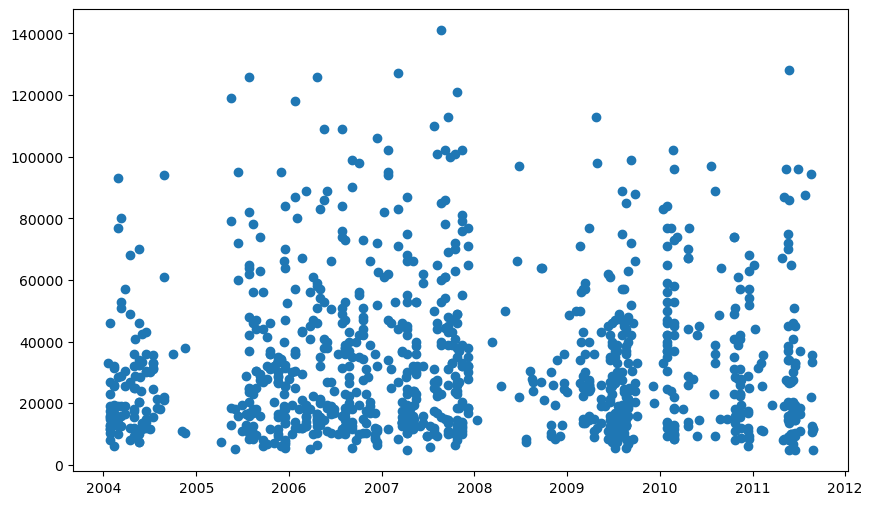

In [13]:
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

Since Jupyter Notebook truncates the data if the number of features is large let's view all the features in head() using it's transpose.

In [14]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Since we are dealing with a timeseries data, it's better to sort the data according to the saledate

In [15]:
df["saledate"].head(10)

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

### Sorting the Dataframe by Saledate

In [16]:
df.sort_values(by = ["saledate"], inplace = True)

In [17]:
df["saledate"].head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


Now let's make a copy of the data for further modifications.  
**Making a copy of the DataFrame**

In [19]:
df_tmp = df.copy()

In [20]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Feature engineering (Enriching data using the saledate feature)

In [21]:
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


Now we don't need saledate column so let's drop it. If required, it is present in the original copy of DataFrame `df`.

In [22]:
df_tmp.drop("saledate", axis = 1, inplace = True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


Let's explore the sales by US States

In [23]:
df_tmp.value_counts("state")

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [24]:
df_tmp.value_counts("ProductGroupDesc")

ProductGroupDesc
Track Excavators       104230
Track Type Tractors     82582
Backhoe Loaders         81401
Wheel Loader            73216
Skid Steer Loaders      45011
Motor Graders           26258
dtype: int64

Before we go ahead with modelling we need to convert `string` data into pandas **`categories`**.

### Converting string data to pandas categories

In [25]:
pd.api.types.is_string_dtype(df["state"])

True

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

Let's itereate through the dataframe and check which features have string type values

In [27]:
for col_name , col_content in df_tmp.items():
    if pd.api.types.is_string_dtype(col_content):
        print(col_name)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Let's change the data type of these features to pandas categories

In [28]:
for col_name, col_content in df_tmp.items():
    if pd.api.types.is_string_dtype(col_content):
        df_tmp[col_name] = col_content.astype("category").cat.as_ordered()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

We have successfully changed the datatype to category

In [29]:
pd.api.types.is_string_dtype(df_tmp["state"])

False

In [30]:
pd.api.types.is_categorical_dtype(df_tmp["state"])

True

In [31]:
df_tmp["state"].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [32]:
df_tmp["state"].cat.codes[:10]

205615    43
274835     8
141296     8
212552     8
62755      8
54653      8
81383      8
204924     8
135376     8
113390     8
dtype: int8

In [33]:
df_tmp["state"][:10]

205615      Texas
274835    Florida
141296    Florida
212552    Florida
62755     Florida
54653     Florida
81383     Florida
204924    Florida
135376    Florida
113390    Florida
Name: state, dtype: category
Categories (53, object): ['Alabama' < 'Alaska' < 'Arizona' < 'Arkansas' ... 'Washington DC' < 'West Virginia' < 'Wisconsin' < 'Wyoming']

We can see that Texas has a code of 43 while Florida has a code of 8.  
The code is set alphabetically.

### Saving Preprocessed data

In [34]:
df_tmp.to_csv("data/bluebook-for-bulldozers/train_valid_tmp.csv", index = False)

In [35]:
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_valid_tmp.csv", low_memory = False)

### Dealing with missing data
Our dataset contains a lot of missing data

In [36]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [37]:
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Filling Features with Numerical Data

Let's first see all the features with numerical data

In [38]:
for col_name, col_content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(col_content):
        print(col_name)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


Let's check the missing values in numerical features

In [39]:
for col_name, col_content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(col_content):
        if col_content.isnull().sum():
            print(col_name, col_content.isnull().sum())

auctioneerID 20136
MachineHoursCurrentMeter 265194


Let's fill these missing numeric values with median of the feature

In [44]:
for col_name, col_content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(col_content):
        if pd.isnull(col_content).sum():
            df_tmp[col_name] = col_content.fillna(col_content.median())
            df_tmp[col_name + "is_missing"] = pd.isnull(col_content) 
            # making new cols to check if data was missing.

Let's check for missing values again

In [45]:
for col_name, col_content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(col_content):
        if col_content.isnull().sum():
            print(col_name, col_content.isnull().sum())

No missing values left.  
Now let's check how many values were filled.

In [46]:
df_tmp["auctioneerIDis_missing"].value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [47]:
df_tmp["MachineHoursCurrentMeteris_missing"].value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeteris_missing, dtype: int64

### Filling missing categories and turning categorical data into numeric data

In [53]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

By default missing values in pandas has a category of -1

In [55]:
pd.Categorical(df_tmp["UsageBand"]).codes

array([-1, -1, -1, ..., -1, -1, -1], dtype=int8)

In [56]:
for col_name, col_content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(col_content):
        # Creating a binary feature showing if the value was missing
        df_tmp[col_name + "_is_missing"] = col_content.isnull()
        # Turning Categories into Numbers and Filling Null Vals
        df_tmp[col_name] = pd.Categorical(col_content).codes + 1


Adding +1 to the category codes will make Null's value from -1 to 0.

In [57]:
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

All the null values have been filled

In [58]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


## 5. Modelling

Now that we have turned dtypes to Numerical and Filled the missing data, we can start modelling

In [61]:
%%time

np.random.seed(0)

X = df_tmp.drop("SalePrice", axis = 1)
y = df_tmp["SalePrice"]

model = RandomForestRegressor(n_jobs = -1, random_state = 0)

model.fit(X, y)

CPU times: user 11min 31s, sys: 6.46 s, total: 11min 37s
Wall time: 1min 46s


RandomForestRegressor(n_jobs=-1, random_state=0)

Let's initally score the model on the same dataset

In [62]:
model.score(X, y)

0.9875764803061743

This scoring metric is on the same set that the model was trained on. So it isn't an accurate representation of the model's generalization

### Splitting the data into Training ang Validation Sets

The validation set is the data for the year `2012`

In [67]:
df_train = df_tmp[df_tmp["saleYear"] != 2012]
df_val = df_tmp[df_tmp["saleYear"] == 2012]

In [68]:
len(df_train), len(df_val)

(401125, 11573)

In [78]:
X_train, y_train = df_train.drop("SalePrice", axis = 1), df_train["SalePrice"]
X_val, y_val = df_val.drop("SalePrice", axis = 1), df_val["SalePrice"]

In [79]:
len(X_train), len(y_train), len(X_val), len(y_val)

(401125, 401125, 11573, 11573)

### Building an evaluation function

In [83]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_true, y_preds):
    '''
    Function that returns the Root Mean Squared Log Error (RMSLE) of y_true and y_preds.
    '''
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def eval_model(model, X_train, X_test, y_train, y_test):
    '''
    Makes prediction and evaluations on given model based on X_train, X_test, y_train and y_test data.
    '''
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    eval_scores = {
        "Train Mean Absolute Error" : mean_absolute_error(y_train, train_preds),
        "Test Mean Absolute Error" : mean_absolute_error(y_test, test_preds),
        "Train Root Mean Squared Log Error" : rmsle(y_train, train_preds),
        "Test Root Mean Squared Log Error" : rmsle(y_test, test_preds),
        "Train R^2" : r2_score(y_train, train_preds),
        "Test R^2" : r2_score(y_test, test_preds)
    }
    return eval_scores

### Testing our model on a subset of the data ( to tune the hyperparameters )

In [90]:
%%time
model = RandomForestRegressor(n_jobs = -1, random_state = 0, max_samples = 10000)
model.fit(X_train, y_train)

CPU times: user 22.7 s, sys: 264 ms, total: 22.9 s
Wall time: 3.19 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=0)

In [91]:
baseline_scores = eval_model(model, X_train, X_val, y_train, y_val)
baseline_scores

{'Train Mean Absolute Error': 5558.52439820505,
 'Test Mean Absolute Error': 7171.1105391860365,
 'Train Root Mean Squared Log Error': 0.25777132630598937,
 'Test Root Mean Squared Log Error': 0.2925990620389206,
 'Train R^2': 0.8606818966052752,
 'Test R^2': 0.832049867497664}

### Tuning the hyperparameters using RandomizedSearchCV

In [96]:
%%time 

from sklearn.model_selection import RandomizedSearchCV

rs_grid = {
    "n_estimators": np.arange(10,200,20),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2),
    "max_features": [0.5, 1, "sqrt"],
    "max_samples": [10000]
}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state=0),
                             param_distributions = rs_grid,
                             cv = 5,
                             n_iter = 100,
                             verbose = True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 5min 18s, sys: 49.6 s, total: 6min 7s
Wall time: 9min 36s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
                   verbose=True)

In [97]:
rs_model.best_params_

{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [98]:
baseline_scores

{'Train Mean Absolute Error': 5558.52439820505,
 'Test Mean Absolute Error': 7171.1105391860365,
 'Train Root Mean Squared Log Error': 0.25777132630598937,
 'Test Root Mean Squared Log Error': 0.2925990620389206,
 'Train R^2': 0.8606818966052752,
 'Test R^2': 0.832049867497664}

In [99]:
rs_scores = eval_model(rs_model, X_train, X_val, y_train, y_val)
rs_scores

{'Train Mean Absolute Error': 5911.904418786114,
 'Test Mean Absolute Error': 7268.799278416505,
 'Train Root Mean Squared Log Error': 0.27010028208693937,
 'Test Root Mean Squared Log Error': 0.29567630218568863,
 'Train R^2': 0.8437098487721018,
 'Test R^2': 0.8271379483482113}

### Traininga a model with the tuned hyperparamets

In [102]:
tuned_model = RandomForestRegressor(n_estimators = 130,
                                    min_samples_split = 10,
                                    min_samples_leaf = 3,
                                    max_samples = None,
                                    max_features = 0.5,
                                    max_depth = None,
                                    n_jobs = -1,
                                    random_state = 0)
tuned_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=130, n_jobs=-1,
                      random_state=0)

In [104]:
tuned_model_scores = eval_model(tuned_model, X_train, X_val, y_train, y_val)
tuned_model_scores

{'Train Mean Absolute Error': 2844.8336474314638,
 'Test Mean Absolute Error': 5884.576654930028,
 'Train Root Mean Squared Log Error': 0.1423311430882674,
 'Test Root Mean Squared Log Error': 0.2417827606636782,
 'Train R^2': 0.9597602190360334,
 'Test R^2': 0.8834509262663633}

### Making Prediction on the Test Data

In [122]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", low_memory=False, parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


The test data must first be preprocessed to be in the same format as that of our training set

In [123]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [124]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

### Preprocessing the data

In [125]:
def preprocess_data(df):
    
    # Feature Engineering using saledate feature
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df["saleDayOfYear"] = df["saledate"].dt.dayofyear
    df.drop("saledate", axis = 1, inplace = True)
    
    # Converting String data to Categories
    for col_name, col_content in df.items():
        if pd.api.types.is_string_dtype(col_content):
            df[col_name] = col_content.astype("category").cat.as_ordered()
            
    # Filling data
    for col_name, col_content in df.items():
        
        # Numerical Data
        if pd.api.types.is_numeric_dtype(col_content):
            if pd.isnull(col_content).sum():
                df[col_name] = col_content.fillna(col_content.median())
                df[col_name + "is_missing"] = pd.isnull(col_content) 
                # making new cols to check if data was missing.
                
        # Categorical Data
        if not pd.api.types.is_numeric_dtype(col_content):
            # Creating a binary feature showing if the value was missing
            df[col_name + "_is_missing"] = col_content.isnull()
            # Turning Categories into Numbers and Filling Null Vals
            df[col_name] = pd.Categorical(col_content).codes + 1
    
    return df

In [126]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [127]:
len(df_test.columns), len(X_train.columns)

(101, 102)

In [129]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerIDis_missing'}

There is no auctioneerID Null values in Test Dataset hence this feature is missing. We can manually add the feature

In [130]:
df_test["auctioneerIDis_missing"] = False

In [139]:
df_test = df_test.reindex(columns=list(X_train.columns))

In [140]:
len(df_test.columns), len(X_train.columns)

(102, 102)

### Making Predictions on the Test set

In [141]:
test_preds = tuned_model.predict(df_test)

In [142]:
test_preds

array([17347.62069212, 18622.20832936, 49162.08708438, ...,
       12535.01052965, 17110.6827157 , 28608.18839628])

In [143]:
test_preds_df = pd.DataFrame()
test_preds_df["SalesID"] = df_test["SalesID"]
test_preds_df["SalesPrice"] = test_preds

In [144]:
test_preds_df

,SalesID,SalesPrice
0,1227829,17347.620692
1,1227844,18622.208329
2,1227847,49162.087084
3,1227848,68131.719246
4,1227863,54513.445507
...,...,...
12452,6643171,39808.592619
12453,6643173,12412.197032
12454,6643184,12535.010530
12455,6643186,17110.682716


In [145]:
test_preds_df.to_csv("data/bluebook-for-bulldozers/predicted_sales_price.csv")

### Feature Importance

In [146]:
tuned_model.feature_importances_

array([3.53002628e-02, 1.87088656e-02, 4.52479013e-02, 1.69110698e-03,
       3.31467160e-03, 2.02627988e-01, 3.03853416e-03, 1.06132675e-03,
       4.36857562e-02, 4.82178584e-02, 6.51843745e-02, 4.59642257e-03,
       1.65203621e-02, 1.54674399e-01, 4.05789591e-02, 6.16942667e-03,
       4.80438342e-03, 1.99096712e-03, 3.24624206e-03, 6.15668687e-02,
       5.12113586e-04, 1.57350151e-04, 8.97199123e-04, 1.72662045e-04,
       1.28939126e-03, 1.73156754e-05, 1.57434491e-03, 8.80231196e-03,
       2.74317863e-03, 1.18944838e-03, 4.88483269e-03, 2.81428978e-03,
       3.32742596e-03, 1.04646077e-03, 1.54317753e-03, 7.08262326e-03,
       8.90458833e-04, 1.01528916e-02, 1.97574037e-03, 2.80213202e-03,
       1.11086498e-03, 1.00593958e-03, 2.27993834e-03, 6.42687057e-04,
       6.23172487e-04, 3.74938015e-04, 4.75575766e-04, 2.21729496e-03,
       8.54676772e-04, 2.84932304e-04, 2.18368761e-04, 7.27219199e-02,
       4.25316178e-03, 6.11113228e-03, 3.09441578e-03, 1.01481018e-02,
      

In [147]:
def plot_features(cols, importance, n = 20):
    df = (pd.DataFrame({"features" : cols, 
                      "Feature Importance" : importance}).
          sort_values("Feature Importance", "ascending).
          reset_index(drop = True))
    #plotting
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["Feature Importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis();

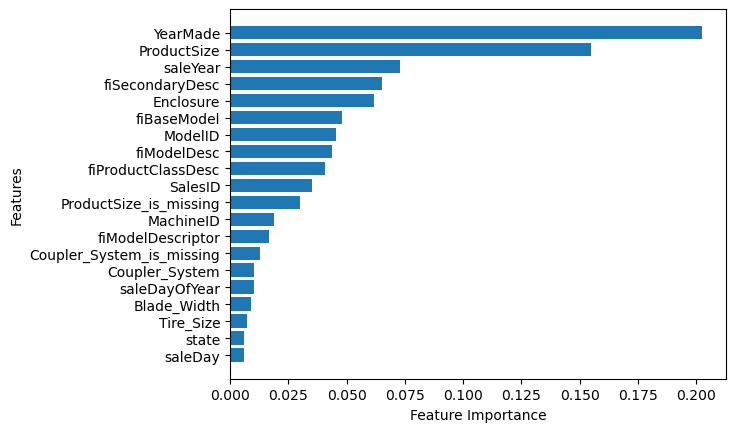

In [151]:
plot_features(X_train.columns, tuned_model.feature_importances_)